# This script applies the gender and face detection to all the images in the posts folder. It then adds the rawdataset variables for each image to the face_var.csv

In [1]:
from facelib import FaceDetector, AgeGenderEstimator

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mplt

In [3]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.patches as patches
import os
import random

# importing pandas as pd  
import pandas as pd  
from IPython.display import clear_output
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from utils import printProgressBar

## The pipeline for each image is:
- detect faces 
- Preprocess each face (done under the hood) 
- Predict on image of each face 
- save amount of people and amount of women 

Here I use code from Facelib: https://github.com/sajjjadayobi/FaceLib which provides both a facedetector and a genderclassifier. 

The face detector is build on MobileNet structure, and the gender calssifier on the Shufflenet. Both are CNN structures built to be effecient, in order to work on mobile devices.

### Example 

In [4]:
#load models
face_detector = FaceDetector(confidence_threshold=0.7)
age_gender_detector = AgeGenderEstimator()


from FaceDetector: weights loaded
from AgeGenderEstimator: weights loaded


In [5]:
#set new fond and gender categories
fontPath = "ufonts.com_times-new-roman-[copy-1].ttf"
font =  ImageFont.truetype (fontPath, 16 )

gender_sex =  {'Male' : "Man",
           'Female' : 'Woman',
              'f': 'Woman',
              'm': 'Man',
              'w': 'Not a person'}

In [6]:
impaths = ["308","108"]

I use image 108 in mette as an example of where the process works well and image 308 as an example of where it does not

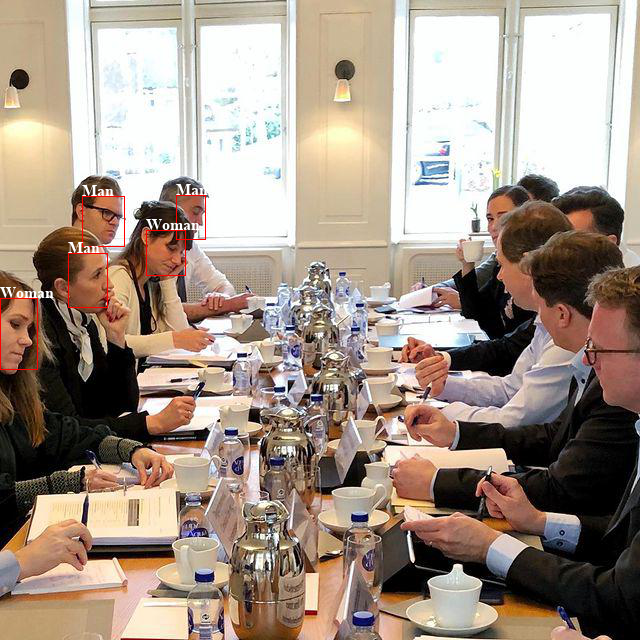

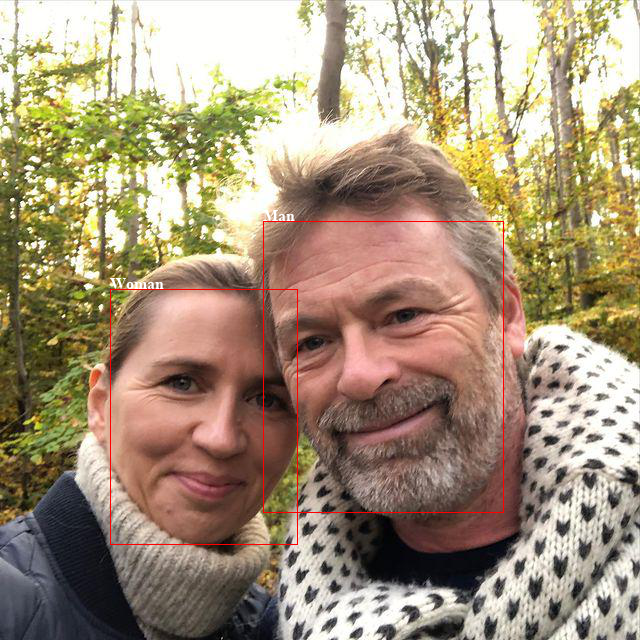

In [7]:
for n in impaths:
    impath = "posts\\mette\\pic_" + str(n) + ".jpeg"
    image = mplt.imread(impath)
    faces, boxes, scores, landmarks = face_detector.detect_align(image)
    img_pil = Image.fromarray(np.array(image))
    img = ImageDraw.Draw(img_pil) 
    genders, ages = age_gender_detector.detect(faces)


    for i in range(len(faces)): 
        img.rectangle(np.array(boxes)[i],outline= "red")
        img.text(xy = (np.array(boxes)[i][0],np.array(boxes)[i][1] - 15),
                 #text = str(np.array(scores)[i][0]),
                 text = gender_sex[genders[i]],
                 font= font,
                fill = "white")
    display(img_pil)
    img_pil.save("plots/" + "CNN_"+ str(n) + ".jpeg")

In [8]:
print("there are",len(faces), "faces detected")

there are 2 faces detected


In [9]:
genders, ages = age_gender_detector.detect(faces)
print([gender_sex[g] for g in genders], ages)

['Man', 'Woman'] [66, 49]


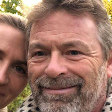

Gender: Man


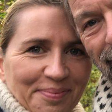

Gender: Woman


In [10]:
for i in range(len(faces)): 
    display(Image.fromarray(np.array(faces[i])))
    print("Gender:",gender_sex[genders[i]])

For this image I would save the amount of people and the share of them who are women. 

# make the loop - apply it to all the images 


In [11]:
dataset = pd.read_csv("data\\rawdataset.csv",index_col="Unnamed: 0")

In [12]:
dataset["path"] = ["posts\\" + str(dataset['user'][i]) + "\\pic_" + str(dataset['post_nr'][i]) + ".jpeg" for i in range(len(dataset))]

In [13]:
facebox = []
dataset['n_men'] = np.nan
dataset['n_women'] = np.nan
dataset['n_people'] = np.nan

In [14]:
printProgressBar(0,len(dataset))
for i in range(len(dataset)):
    path = dataset.loc[i,'path']
    
    image =  np.array(mplt.imread(path))
    #predict faces
    faces, boxes, scores, landmarks = face_detector.detect_align(image)
         
    #predict gender
        
    #check if there are any faces
    if len(faces) != 0:
        genders, ages = age_gender_detector.detect(faces)
        facebox.append(boxes)
    else:
        genders = [0]
        facebox.append(np.nan)
    
    
    #save the n_people and genders
    
    dataset.loc[i,'n_people'] = len(faces)
    dataset.loc[i,'n_women'] = genders.count("Female")
    dataset.loc[i,'n_men'] = genders.count("Male")
    printProgressBar(i,len(dataset))

In [15]:
dataset.to_csv("data\\face_vars.csv")